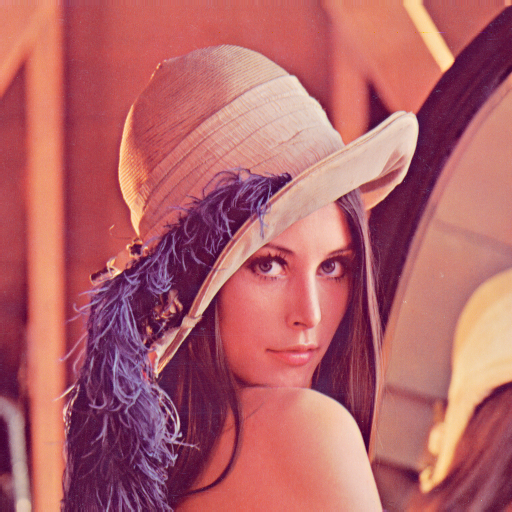

In [5]:
from PIL import Image
# display image in colab
image_colored = Image . open ("/Lenna_(test_image).png")
display ( image_colored )

In [43]:
print ( " Image Format : " , image_colored . format )
print ( " Image Size : " , image_colored . size )
print ( " Image Mode : " , image_colored . mode )

 Image Format :  PNG
 Image Size :  (512, 512)
 Image Mode :  RGB


In [44]:
# Get the size (width , height ) and channels (RGB)
width , height = image_colored . size
channels = len( image_colored . getbands () ) # For RGB , it
print ( f" Image shape (RGB): ({ height } , { width } , { channels})")
image_size_colored = width * height *3
print ( f" Image size (RGB): { image_size_colored }")

 Image shape (RGB): (512 , 512 , 3)
 Image size (RGB): 786432


In [45]:
# Convert the Pillow image to a NumPy array
image_array_colored = np . array ( image_colored )
# Display the shape of the NumPy array (height , width ,channels )
print (" Shape of the image array :", image_array_colored .shape )

 Shape of the image array : (512, 512, 3)


In [46]:
import numpy as np

Shape of the image array: (512, 512, 3)


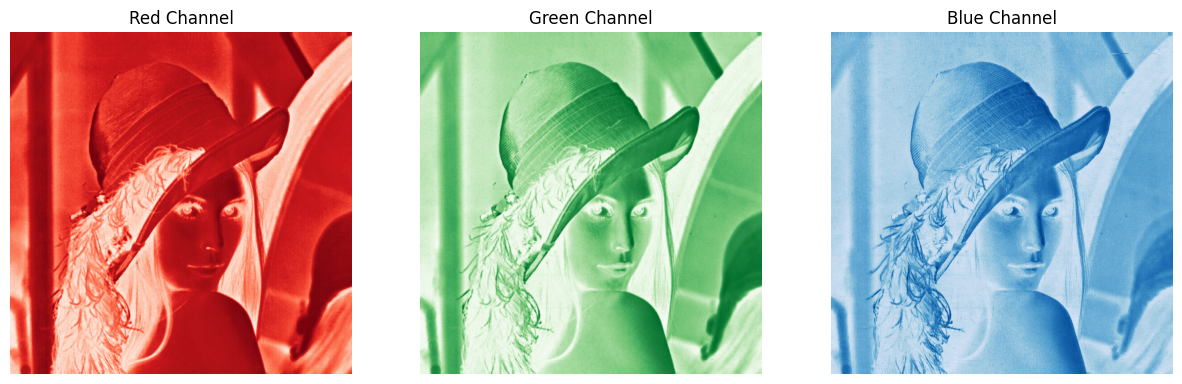

In [49]:



# Convert the Pillow image to a NumPy array
image_array_colored = np.array(image_colored)

# Display the shape of the NumPy array (height, width, channels)
print("Shape of the image array:", image_array_colored.shape)

# Extracting individual color channels
red_channel = image_array_colored[:, :, 0]   # Red channel
green_channel = image_array_colored[:, :, 1] # Green channel
blue_channel = image_array_colored[:, :, 2]  # Blue channel

# Display the color channels using colormap
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Red channel
axes[0].imshow(red_channel, cmap="Reds")
axes[0].set_title("Red Channel")
axes[0].axis("off")

# Green channel
axes[1].imshow(green_channel, cmap="Greens")
axes[1].set_title("Green Channel")
axes[1].axis("off")

# Blue channel
axes[2].imshow(blue_channel, cmap="Blues")
axes[2].set_title("Blue Channel")
axes[2].axis("off")

plt.show()


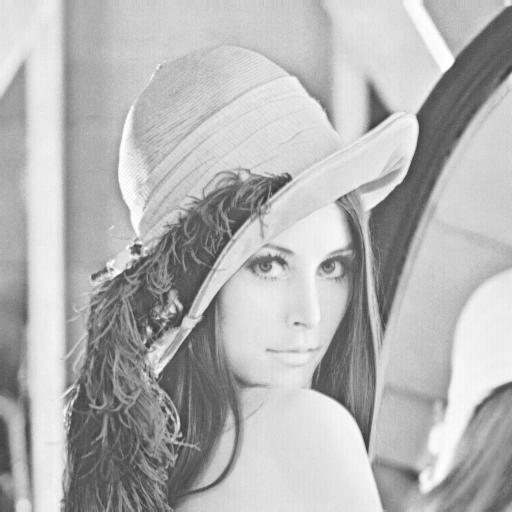

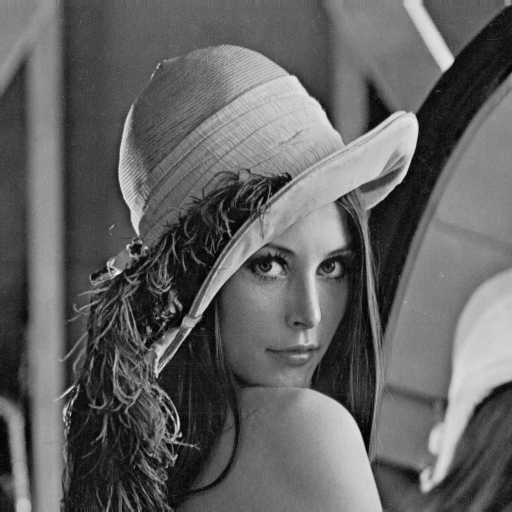

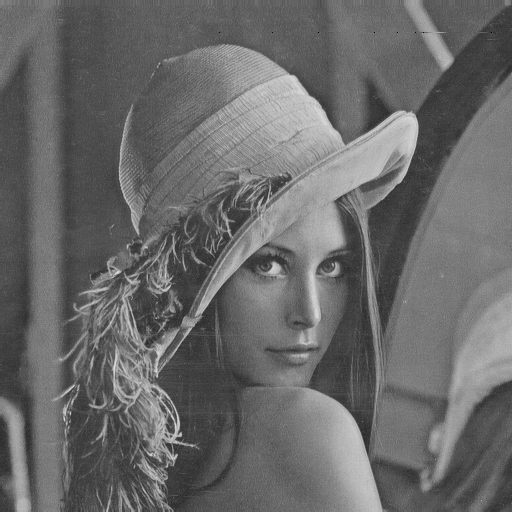

In [14]:
# Assuming image_colored is already defined and loaded above
# Get the R, G, and B channels
r , g , b = image_colored . split ()
# Display or further process the individual channels
display ( r )
display ( g )
display ( b )

In [16]:
# Sample Implementation :
# Accessing a specific row - 100 th row
row_100 = image_array_colored [100 , : , :]
# Accessing a specific column - 50 th col
col_50 = image_array_colored [: , 50 , :]
# Accessing a specific pixel (row 10 , col 20)
pixel = image_array_colored [10 , 20 , :] # Gets RGB values at (10 ,20)

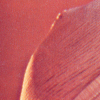

In [20]:
left = 100
upper = 50
right = 200
lower = 150

# Crop the image
cropped_image = image_colored.crop((left, upper, right, lower))

# Display the cropped image
cropped_image.show()
display ( cropped_image )

In [22]:
# Create a NumPy array (Example: black image)
image_array = np.zeros((100, 100, 3), dtype=np.uint8)

# Convert the NumPy array back to a Pillow Image object
image_from_array = Image.fromarray(image_array)

# Display the image
image_from_array.show()

# Save the image (Remove extra spaces in the filename)
image_from_array.save("output_image.jpg")

In [23]:
import numpy as np
import matplotlib . pyplot as plt
from PIL import Image
# Load image and convert to grayscale
image = Image . open ("/Lenna_(test_image).png") . convert ("L")
# Convert to NumPy array
image_array = np . array ( image )
# Get image dimensions
height , width = image_array . shape
# Reshape the image into a 2D array where each row represents a row of pixels
# This allows PCA to process each row as an observationand find patterns across pixel intensities
data = image_array . reshape ( height , width )

In [24]:
# Compute the mean of each column ( feature )
mean = np . mean ( data , axis =0)
# Subtract mean to center the data
centered_data = data - mean

In [25]:
# Compute covariance matrix
cov_matrix = np . cov ( centered_data , rowvar = False )

In [26]:
# Compute eigenvalues and eigenvectors
eigenvalues , eigenvectors = np . linalg . eigh ( cov_matrix )
# Sort eigenvalues and corresponding eigenvectors in descending order
sorted_indices = np . argsort ( eigenvalues ) [:: -1]
eigenvalues = eigenvalues [ sorted_indices ]
eigenvectors = eigenvectors [: , sorted_indices ]

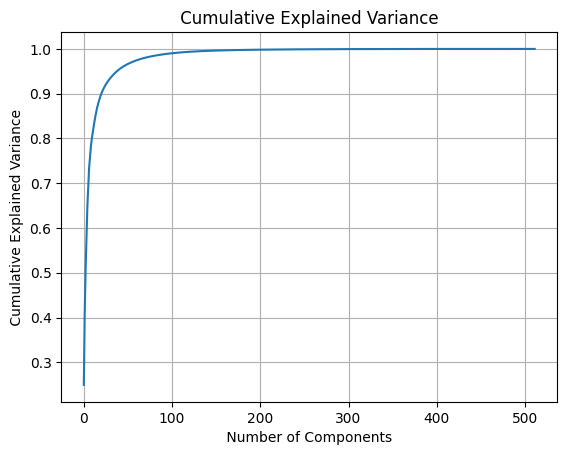

In [27]:
# Plot the explained variance ratio
explained_variance_ratio = eigenvalues / np .sum ( eigenvalues )
plt . plot ( np . cumsum ( explained_variance_ratio ) )
plt . title (" Cumulative Explained Variance ")
plt . xlabel (" Number of Components ")
plt . ylabel (" Cumulative Explained Variance ")
plt . grid ( True )
plt . show ()

In [28]:
k = 50 # Choose k principal components
components = eigenvectors [: , : k ]

In [29]:
#Project the data onto the principal components
compressed_data = np . dot ( centered_data , components )

In [31]:
# Reconstruct the image from compressed data
decompressed_data = np . dot ( compressed_data , components . T ) +mean

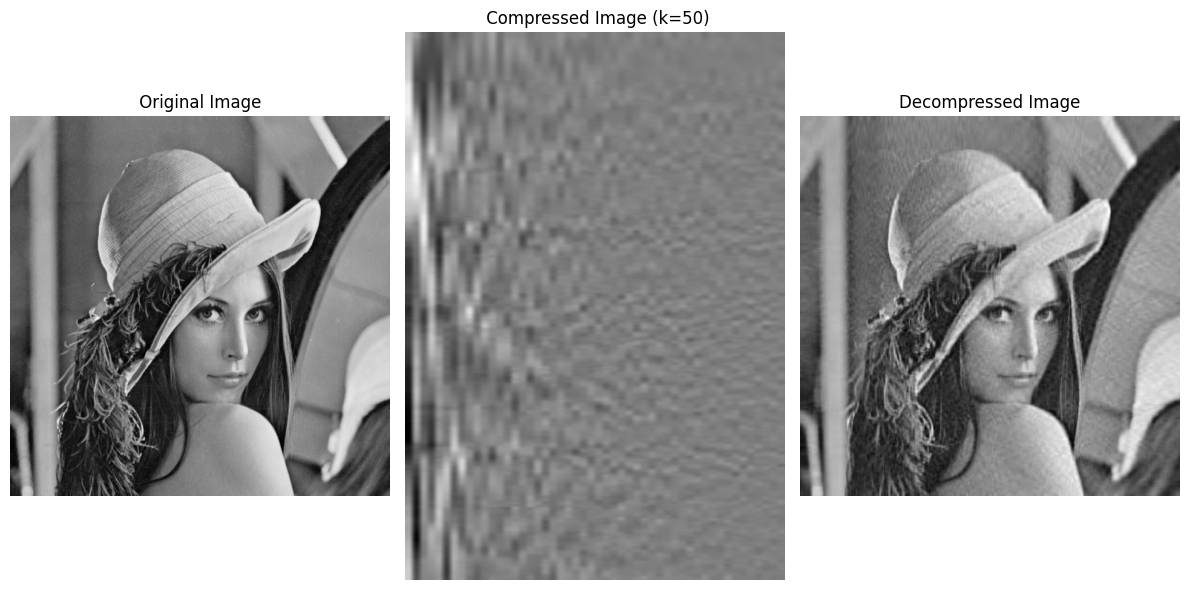

In [40]:
plt . figure ( figsize =(12 , 6) )
# Original Image
plt . subplot (1 , 3 , 1)
plt . imshow ( image_array , cmap ="gray")
plt . title (" Original Image ")
plt . axis ("off")
# Compressed Representation
plt . subplot (1 , 3 , 2)
plt . imshow ( compressed_data , cmap ="gray", aspect ="auto")
plt . title ( f" Compressed Image (k={k})")
plt . axis ("off")
# Decompressed Image
plt . subplot (1 , 3 , 3)
plt . imshow ( decompressed_data , cmap ="gray")
plt . title ("Decompressed Image")
plt . axis ("off")
plt . tight_layout ()
plt . show ()